In [458]:
import os
import cv2
import numpy as np
from random import random
import tensorflow as tf
from random import random, seed
from datetime import datetime

CATEGORIES = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]

path = "C:/Users/user/Documents/Code/Machine-Learning/img"
pathSave = "C:/Users/user/Documents/Code/Machine-Learning/imgToCharacters"
pathDataset = "C:/Users/user/Documents/Code/Machine-Learning/my_dataset/train"

list_line = []
list_y = []

borderSize = 20

IMSIZE = 50

In [459]:
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), 0)
    ret, thresh = cv2.threshold(img_array, 127, 255, 0)

In [460]:
kernel = np.ones((2,40),np.uint8)
erosion = cv2.erode(thresh, kernel, iterations=10)
border = cv2.copyMakeBorder(erosion, borderSize, borderSize, borderSize, borderSize, cv2.BORDER_CONSTANT, value=[255,255,255])

image, contours, hierarchy = cv2.findContours(border, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        if w*h < 600*3000 and w*h > 100*100:
            if x < borderSize:
                x = borderSize
            if y < borderSize:
                y = borderSize
            img_crop = img_array[y-borderSize:y+h-borderSize, x-borderSize:x+w-borderSize]
            list_line.append(img_crop)
            list_y.append(y)
            cv2.imwrite(os.path.join(pathSave, "img-%s.png" %random()), img_crop)

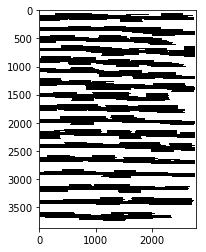

In [461]:
import matplotlib.pyplot as plt
plt.imshow(border, cmap="gray")
plt.show()

In [462]:
array_y_line = []
for i in range(len(list_y)):
    array = [list_y[i], list_line[i]]
    array_y_line.append(array)
    
array_y_line.sort(key=lambda x:x[0])

print(len(array_y_line))

17


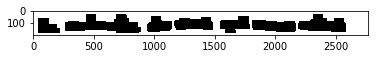

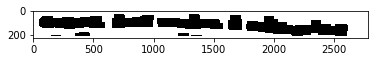

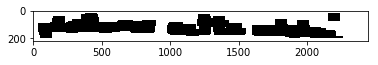

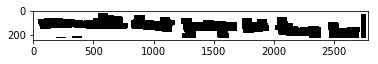

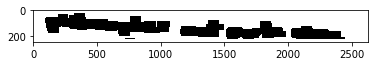

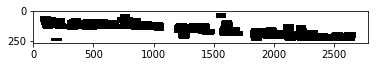

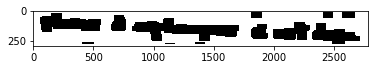

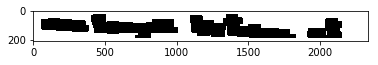

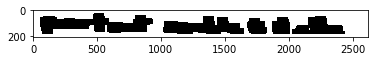

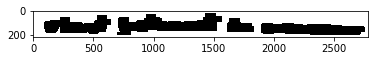

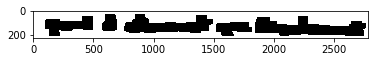

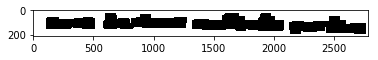

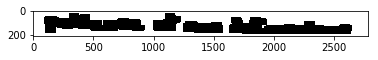

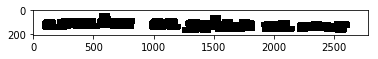

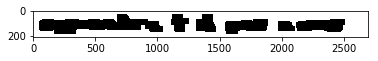

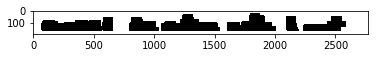

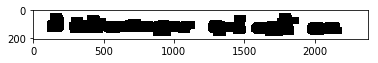

In [463]:
array_line_word = []
for y, line in array_y_line:
    img_array = line
    ret, thresh = cv2.threshold(img_array, 127, 255, 0)
    kernel = np.ones((2,3),np.uint8)
    erosion = cv2.erode(thresh, kernel, iterations=40)
    border = cv2.copyMakeBorder(erosion, borderSize, borderSize, borderSize, borderSize, cv2.BORDER_CONSTANT, value=[255,255,255])

    plt.imshow(border, cmap="gray")
    plt.show()
    image, contours, hierarchy = cv2.findContours(border, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    list_word = []
    list_x = []
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        if w*h < 1000*300 and w*h > 100*100 and h > 50:
            if x < borderSize:
                x = borderSize
            if y < borderSize:
                y = borderSize
            img_crop = img_array[y-borderSize:y+h-borderSize, x-borderSize:x+w-borderSize]
            list_word.append(img_crop)
            list_x.append(x)
    array_word_x = []
    for i in range(len(list_x)):
        array = [list_word[i], list_x[i]]
        array_word_x.append(array)
    
    array_word_x.sort(key=lambda x:x[1])
    array = []
    for word, x in array_word_x:
        array.append(word)
    array_line_word.append(array)

In [464]:
i = 0
for line in array_line_word:
    for word in line:
        i += 1

print("nombre de mot: " + str(i))

nombre de mot: 84


In [465]:
array_line_word_char = []

for line in array_line_word:
    
    array_word_char = []
    
    for word in line:
        
        word_char = []
        
        img_array = word
        ret, thresh = cv2.threshold(img_array, 127, 255, 0)
        kernel = np.ones((45,3),np.uint8)
        erosion = cv2.erode(thresh, kernel, iterations=1)
        border = cv2.copyMakeBorder(erosion, borderSize, borderSize, borderSize, borderSize, cv2.BORDER_CONSTANT, value=[255,255,255])
        #plt.imshow(border,cmap="gray")
        #plt.show()
        image, contours, hierarchy = cv2.findContours(border, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
        list_char = []
        list_x = []
        
        for cnt in contours:
            x,y,w,h = cv2.boundingRect(cnt)
            if w*h < 150*100 and w*h > 20*50:
                if x <= borderSize:
                    x = borderSize
                if y <= borderSize:
                    y = borderSize
                img_crop = thresh[y-borderSize:y+h-borderSize, x-borderSize:x+w-borderSize]
                list_char.append(img_crop)
                list_x.append(x)
        
        # Classer
        
        array_char_x = []
        for i in range(len(list_char)):
            array = [list_char[i], list_x[i]]
            array_char_x.append(array)
            
        array_char_x.sort(key=lambda x:x[1])
        
        array = []
        for char, x in array_char_x:
            array.append(char)
        array_word_char.append(array)
        
    array_line_word_char.append(array_word_char)
    

In [492]:
model = tf.keras.models.load_model("readable-model.model")

In [493]:
array_predictions = []

for line in array_line_word_char:
    for word in line:
        for char in word:
            new_char = cv2.resize(char, (IMSIZE, IMSIZE))
            new_char = np.array(new_char).reshape(-1,50,50,1)
            new_char = new_char / 255.0
            prediction = model.predict(new_char)
            array_predictions.append(CATEGORIES[np.argmax(prediction)])
        array_predictions.append(' ')

text = "".join(array_predictions)
text = text.strip()
print(text)

la volonte du vrai qui noug entrai encore dans nombre d entreprises perilleuses cette celebte veracite dent jusgu ici tous les philosophes ont parle avec veneration que de problemes pleins d equivogues c est deja une longue histoire et pourtant semble c il elle vient justement de commencer guoi d etonnant que finalement noos devions mepiants perdions patience et nous detournions excedes cz sphinx ne nous dpprendra t il pas a nous aoss i de notre cote l art d interroger gui est cz


In [494]:
real_text = "la volonte du vrai qui nous entrai encore dans nombre d entreprises perilleuses cette celebre veracite dont jusqu ici tous les philosophes ont parle avec veneration que de problemes pleins d equivoques c est deja une longue histoire et pourtant semble t il elle vient justement de commencer quoi d etonnant que finalement nous devions mefiants perdions patience et nous detournions excedes ce sphinx ne nous apprendra t il pas a nous aussi de notre cote l art d interroger qui est ce"

In [495]:
print(len(text.strip()), len(real_text))

484 483


In [496]:
miss = []
i = 0
text = text.replace(" ", "")
real_text = real_text.replace(" ", "")

#if len(text) == len(real_text):
 #   i = 0
for line in array_line_word_char:
    for word in line:
        for char in word:
            if text[i] != real_text[i]:
                print(i, text[i], real_text[i])
                miss.append([char, real_text[i]])
            i += 1
                
#else:
 #   print("Erreur mauvaise correction")

print(len(miss))

21 g s
77 t r
88 e o
94 g q
166 g q
211 c t
243 g q
271 o u
282 p f
329 z e
342 d a
363 o u
393 g q
400 z e
14


In [490]:
for img, cat in miss:
    print(cat)

c
t
t
u
u
v
t
c
s
s


In [491]:
seed(datetime.now())

for img, cat in miss:
    t = random()
    pathCat = os.path.join(pathDataset, cat)
    cv2.imwrite(os.path.join(pathCat,"img%s.png"%t, ), img)